<a href="https://colab.research.google.com/github/PranavBharadwaj-1328/FaceMaskDetection/blob/main/maskdetect_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
trained_model = tf.keras.applications.vgg16.VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in trained_model.layers:
  layer.trainable = False

In [ ]:
last_layer = trained_model.get_layer('block5_pool')
last_output = last_layer.output

In [ ]:
x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(1, activation='sigmoid')(x)
model = Model(trained_model.input,x)
model.compile(optimizer = Adam(learning_rate=0.0001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy()])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
base = '/content/drive/MyDrive/data'
train = os.path.join(base,'Train')
test = os.path.join(base,'Test')

In [ ]:
train_settings = ImageDataGenerator(rescale=1.0/255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
test_settings = ImageDataGenerator(rescale=1.0/255.)

In [ ]:
train_gen = train_settings.flow_from_directory(train,
                                               batch_size=64,
                                               class_mode='binary',
                                               target_size=(224,224))
test_gen = test_settings.flow_from_directory(test,
                                               batch_size=20,
                                               class_mode='binary',
                                               target_size=(224,224))

Found 2342 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
history = model.fit(train_gen,
                    validation_data=test_gen,
                    verbose=1,
                    shuffle=True,
                    epochs=4,
                    steps_per_epoch=10,
                    validation_steps=5)

Epoch 1/4
10/10 [==============================] - 382s 37s/step - loss: 0.6027 - binary_accuracy: 0.6482 - val_loss: 0.3234 - val_binary_accuracy: 0.9200
Epoch 2/4
10/10 [==============================] - 393s 39s/step - loss: 0.3475 - binary_accuracy: 0.8641 - val_loss: 0.1290 - val_binary_accuracy: 0.9800
Epoch 3/4
10/10 [==============================] - 386s 39s/step - loss: 0.2308 - binary_accuracy: 0.9141 - val_loss: 0.1657 - val_binary_accuracy: 0.9400
Epoch 4/4
10/10 [==============================] - 386s 39s/step - loss: 0.1809 - binary_accuracy: 0.9312 - val_loss: 0.1056 - val_binary_accuracy: 0.9600


In [ ]:
print('Accuracy:'+ str(history.history['binary_accuracy']))
print('Loss:'+ str(history.history['loss']))
print('Validation accuracy:'+ str(history.history['val_binary_accuracy']))
print('Validation loss:'+ str(history.history['val_loss']))

Accuracy:[0.6482084393501282, 0.864062488079071, 0.9140625, 0.9312499761581421]
Loss:[0.6026751399040222, 0.3474555015563965, 0.23078612983226776, 0.18087978661060333]
Validation accuracy:[0.9200000166893005, 0.9800000190734863, 0.9399999976158142, 0.9599999785423279]
Validation loss:[0.3233996629714966, 0.12904798984527588, 0.165731281042099, 0.10556159168481827]


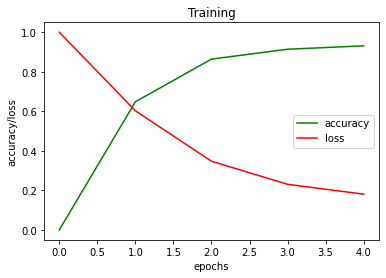

In [ ]:
import matplotlib.pyplot as plt
epochs = [0,1,2,3,4]
plt.title('Training')
plt.plot(epochs,[0]+history.history['binary_accuracy'],'g-')
plt.plot(epochs,[1]+history.history['loss'],'r-')
plt.xlabel('epochs')
plt.ylabel('accuracy/loss')
plt.legend(['accuracy','loss'], loc='center right')
plt.show()


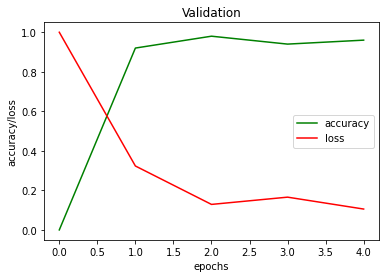

In [ ]:
plt.title('Validation')
plt.plot(epochs,[0]+history.history['val_binary_accuracy'],'g-')
plt.plot(epochs,[1]+history.history['val_loss'],'r-')
plt.xlabel('epochs')
plt.ylabel('accuracy/loss')
plt.legend(['accuracy','loss'], loc='center right')
plt.show()